In [1]:
!pip install -q kagglehub


In [2]:
import kagglehub

dataset_path = kagglehub.dataset_download(
    "dschettler8845/brats-2021-task1"
)

print("Dataset mounted at:", dataset_path)


Using Colab cache for faster access to the 'brats-2021-task1' dataset.
Dataset mounted at: /kaggle/input/brats-2021-task1


In [3]:
import tarfile
import os

EXTRACT_DIR = "/content/BraTS2021"
os.makedirs(EXTRACT_DIR, exist_ok=True)

TAR_FILE = os.path.join(dataset_path, "BraTS2021_Training_Data.tar")

with tarfile.open(TAR_FILE) as tar:
    tar.extractall(path=EXTRACT_DIR)

print("✅ Dataset extracted to:", EXTRACT_DIR)


/tmp/ipython-input-2661406407.py:10: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=EXTRACT_DIR)


✅ Dataset extracted to: /content/BraTS2021


In [4]:
import os

folders = os.listdir("/content/BraTS2021")
print("Total patient folders:", len(folders))
print("Sample folders:", folders[:5])


Total patient folders: 1252
Sample folders: ['BraTS2021_00236', 'BraTS2021_01189', 'BraTS2021_01315', 'BraTS2021_00525', 'BraTS2021_00789']


In [5]:
DATA_DIR = "/content/BraTS2021"


In [6]:
import os

patients = os.listdir(DATA_DIR)
print(len(patients))
print(patients[:3])


1252
['BraTS2021_00236', 'BraTS2021_01189', 'BraTS2021_01315']


In [7]:
!pip install monai torchio nibabel -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.3/194.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 14.3 MB/s eta 0:00:00


In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [9]:
BASE_DIR = "/content/BraTS2021"
CASE_ID = "BraTS2021_00495"
case_path = os.path.join(BASE_DIR, CASE_ID)

img_t1     = nib.load(os.path.join(case_path, f"{CASE_ID}_t1.nii.gz"))
img_t1ce   = nib.load(os.path.join(case_path, f"{CASE_ID}_t1ce.nii.gz"))
img_t2     = nib.load(os.path.join(case_path, f"{CASE_ID}_t2.nii.gz"))
img_flair  = nib.load(os.path.join(case_path, f"{CASE_ID}_flair.nii.gz"))
img_seg    = nib.load(os.path.join(case_path, f"{CASE_ID}_seg.nii.gz"))

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)


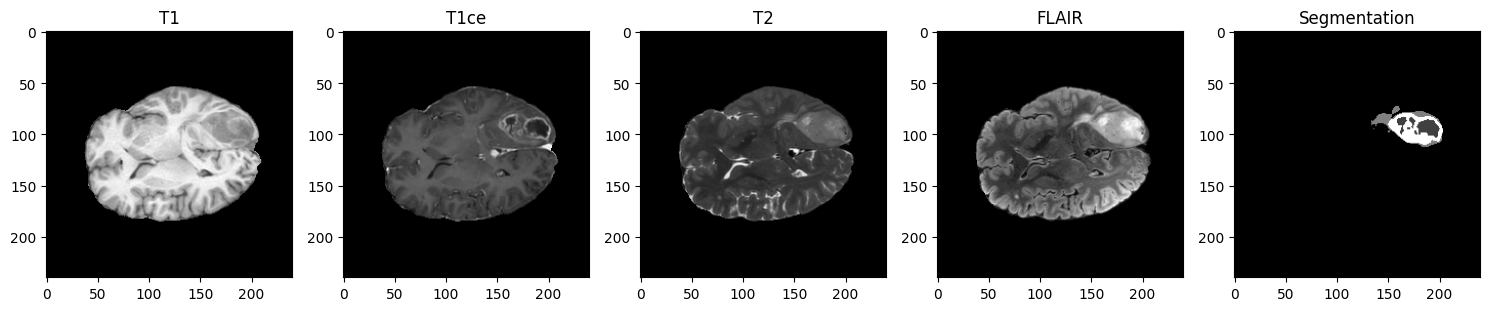

In [10]:
import matplotlib.pyplot as plt

# Convert NIfTI images to NumPy arrays
t1_vol     = img_t1.get_fdata()
t1ce_vol   = img_t1ce.get_fdata()
t2_vol     = img_t2.get_fdata()
flair_vol  = img_flair.get_fdata()
mask_vol   = img_seg.get_fdata()

# Check volume shapes
print(t1_vol.shape)
print(t1ce_vol.shape)
print(t2_vol.shape)
print(flair_vol.shape)
print(mask_vol.shape)

# Pick middle slice index
mid_slice = t1_vol.shape[2] // 2

# Plot sample slices from each modality
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(t1_vol[:, :, mid_slice], cmap="gray")
plt.title("T1")

plt.subplot(1, 5, 2)
plt.imshow(t1ce_vol[:, :, mid_slice], cmap="gray")
plt.title("T1ce")

plt.subplot(1, 5, 3)
plt.imshow(t2_vol[:, :, mid_slice], cmap="gray")
plt.title("T2")

plt.subplot(1, 5, 4)
plt.imshow(flair_vol[:, :, mid_slice], cmap="gray")
plt.title("FLAIR")

plt.subplot(1, 5, 5)
plt.imshow(mask_vol[:, :, mid_slice], cmap="gray")
plt.title("Segmentation")

plt.tight_layout()
plt.show()


In [11]:
# Load image volumes as NumPy arrays
t1_data    = img_t1.get_fdata()
t1ce_data  = img_t1ce.get_fdata()
t2_data    = img_t2.get_fdata()
flair_data = img_flair.get_fdata()
seg_data   = img_seg.get_fdata()

# Quick sanity check (prints full array – large output)
print(t1_data)


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [12]:
# Nicer NumPy printing
np.set_printoptions(suppress=True, precision=3)

# Get affine matrix of T1 image
t1_affine = img_t1.affine

print(t1_affine)


[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


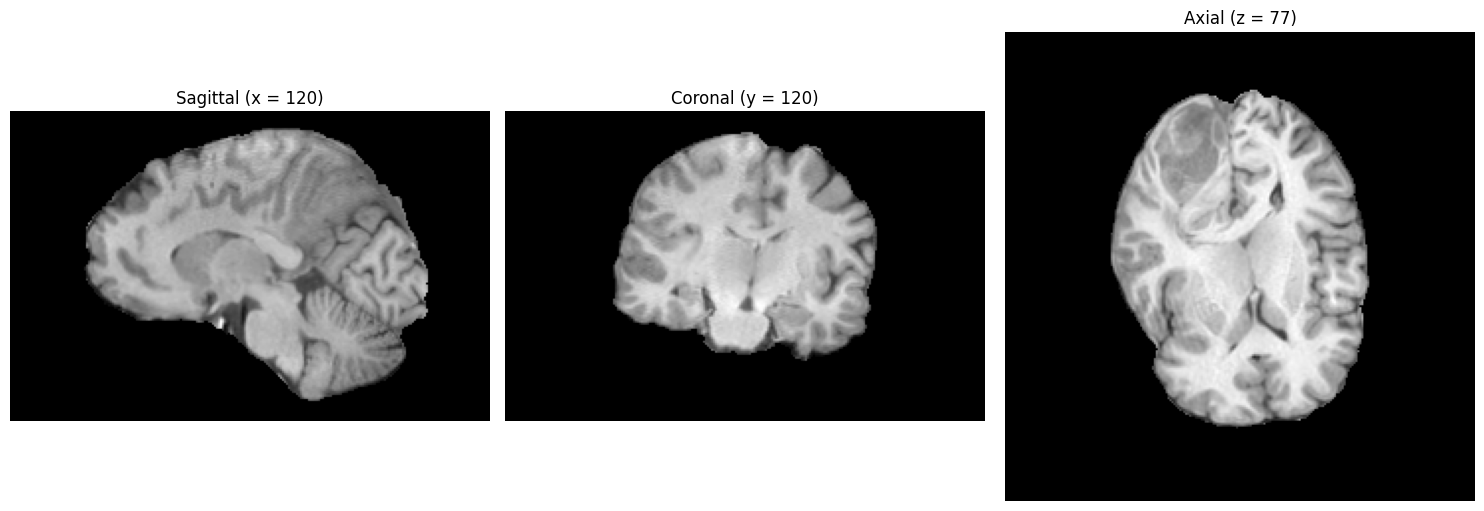

In [13]:
# Get volume dimensions
dim_x, dim_y, dim_z = t1_data.shape

# Center indices
cx = dim_x // 2
cy = dim_y // 2
cz = dim_z // 2

# Extract central slices from all three planes
def extract_center_slices(volume):
    axial_slice    = volume[:, :, cz]
    coronal_slice  = volume[:, cy, :]
    sagittal_slice = volume[cx, :, :]
    return [sagittal_slice, coronal_slice, axial_slice]


# Display slices side by side
def plot_slices(slice_list):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for idx, slc in enumerate(slice_list):
        axes[idx].imshow(slc.T, cmap="gray", origin="lower")
        axes[idx].axis("off")

    axes[0].set_title(f"Sagittal (x = {cx})")
    axes[1].set_title(f"Coronal (y = {cy})")
    axes[2].set_title(f"Axial (z = {cz})")

    plt.tight_layout()
    plt.show()


# Visualize T1 volume slices
plot_slices(extract_center_slices(t1_data))


In [14]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import torchio as tio
import seaborn as sns

from monai.transforms import LoadImage, NormalizeIntensity, ScaleIntensity

import warnings
warnings.filterwarnings("ignore")


<frozen importlib._bootstrap_external>:1301: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.


In [15]:
from monai.transforms import LoadImage

img_loader = LoadImage(image_only=False)

class BratsDataset(Dataset):
    def __init__(self, root_dir, aug=None, split="train"):
        self.root_dir = root_dir
        self.cases = next(os.walk(root_dir))[1]
        self.aug = aug
        self.split = split

    def __len__(self):
        return len(self.cases)

    def __getitem__(self, index):
        case_id = self.cases[index]
        case_path = os.path.join(self.root_dir, case_id)

        # Load MRI modalities
        scans = {}
        for mod in ["t1", "t1ce", "t2", "flair"]:
            path = os.path.join(case_path, f"{case_id}_{mod}.nii.gz")
            img, meta = img_loader(path)
            scans[mod] = (img, meta)

        affine_mat = scans["flair"][1]["affine"]

        # Load segmentation (train only)
        label_map = None
        if self.split == "train":
            seg_path = os.path.join(case_path, f"{case_id}_seg.nii.gz")
            seg_vol, _ = img_loader(seg_path)

            # Remap BraTS labels → consecutive classes
            seg_clean = np.zeros_like(seg_vol, dtype=np.uint8)
            seg_clean[seg_vol == 1] = 0
            seg_clean[seg_vol == 2] = 1
            seg_clean[seg_vol == 4] = 2

            seg_tensor = torch.from_numpy(seg_clean).unsqueeze(0)
            label_map = tio.LabelMap(tensor=seg_tensor, affine=affine_mat)

        # Stack modalities: [C, H, W, D]
        stacked_vol = np.stack(
            [scans["flair"][0], scans["t1"][0], scans["t1ce"][0], scans["t2"][0]],
            axis=0
        )

        img_tensor = torch.from_numpy(stacked_vol.astype(np.float32))
        img_obj = tio.ScalarImage(tensor=img_tensor, affine=affine_mat)

        subject = tio.Subject(
            image=img_obj,
            mask=label_map if label_map is not None else None
        )

        # Standard orientation + spacing
        subject = tio.Compose([
            tio.ToCanonical(),
            tio.Resample((1, 1, 1)),
        ])(subject)

        if self.aug:
            subject = self.aug(subject)

        return {
            "image": subject["image"].data,
            "seg": subject["mask"].data if "mask" in subject else None
        }


In [16]:
# Augmentations for training data
train_aug = tio.Compose([
    tio.RandomFlip(axes=0),
    tio.RandomFlip(axes=1),
    tio.RandomAffine(),
    tio.RandomElasticDeformation(),

    # Image-only noise
    tio.RandomNoise(p=0.2, include=["image"]),
    tio.RandomBlur(p=0.3, include=["image"]),
    tio.ZNormalization(include=["image"]),

    # Applied to image + mask
    tio.CropOrPad((160, 160, 96)),
])

# Validation / test transforms (no augmentation)
eval_aug = tio.Compose([
    tio.ZNormalization(include=["image"]),
    tio.CropOrPad((160, 160, 96)),
])


In [17]:
# Path to extracted BraTS dataset
data_root = "/content/BraTS2021"

# Initialize training dataset
train_data = BratsDataset(
    root_dir=data_root,
    aug=train_aug,
    split="train"
)

print("Total samples:", len(train_data))


Total samples: 1251


In [18]:
# Inspect one sample
example = train_data[1]

print("Input volume shape:", example["image"].shape)   # (C, H, W, D)

if example["seg"] is not None:
    print("Mask shape:", example["seg"].shape)


Input volume shape: torch.Size([4, 160, 160, 96])
Mask shape: torch.Size([1, 160, 160, 96])


In [19]:
from torch.utils.data import Subset, random_split

# Full dataset without augmentation (base data)
base_data = BratsDataset(
    root_dir=data_root,
    aug=None,
    split="train"
)

# Small subset for quick testing
debug_data = Subset(base_data, list(range(10)))

# Train / Val / Test split
n_total = len(debug_data)
n_train = int(0.7 * n_total)
n_val   = int(0.15 * n_total)
n_test  = n_total - n_train - n_val

train_set, val_set, test_set = random_split(
    debug_data, [n_train, n_val, n_test]
)

# Wrapper to apply transforms
class AugmentWrapper(Dataset):
    def __init__(self, data, tfm):
        self.data = data
        self.tfm = tfm

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]

        subj = tio.Subject(
            image=tio.ScalarImage(tensor=item["image"]),
            mask=tio.LabelMap(tensor=item["seg"]) if item["seg"] is not None else None
        )

        subj = self.tfm(subj)

        return {
            "image": subj["image"].data,
            "seg": subj["mask"].data if "mask" in subj else None
        }


In [20]:
# Apply transforms to each split
train_data = AugmentWrapper(train_set, train_aug)
val_data   = AugmentWrapper(val_set, eval_aug)
test_data  = AugmentWrapper(test_set, eval_aug)

# DataLoaders
train_loader = DataLoader(train_data, batch_size=3, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=3, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=3, shuffle=False)


In [21]:
import torch
import gc

# Free unused memory
gc.collect()

# Clear GPU cache (if using CUDA)
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()


In [22]:
from monai.networks.nets import UNet

# Select device
run_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 3D U-Net model
unet_model = UNet(
    spatial_dims=3,
    in_channels=4,
    out_channels=3,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm="instance",
).to(run_device)

# Quick check
print("Output classes:", unet_model.out_channels)


Output classes: 3


In [23]:
from monai.losses import DiceCELoss
from monai.metrics import DiceMetric, MeanIoU

# Loss function: Dice + Cross Entropy
criterion = DiceCELoss(to_onehot_y=True, softmax=True)

# Optimizer
optim = torch.optim.Adam(unet_model.parameters(), lr=1e-4)

# Evaluation metrics
dice_score = DiceMetric(
    include_background=False,
    reduction="mean"
)

iou_score = MeanIoU(
    include_background=False,
    reduction="mean"
)


In [24]:
from tqdm import tqdm
from monai.networks.utils import one_hot

# Move model to device
unet_model = unet_model.to(run_device)

num_epochs = 2

for ep in range(num_epochs):
    # -------- Training --------
    unet_model.train()
    running_loss = 0.0

    for batch in tqdm(train_loader):
        x = batch["image"].to(run_device)
        y = batch["seg"].to(run_device).long()

        optim.zero_grad()
        preds = unet_model(x)
        loss = criterion(preds, y)
        loss.backward()
        optim.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {ep+1} | Train Loss: {avg_loss:.4f}")

    # -------- Validation --------
    unet_model.eval()
    dice_score.reset()
    iou_score.reset()

    with torch.no_grad():
        for batch in val_loader:
            x = batch["image"].to(run_device)
            y = batch["seg"].to(run_device).long()

            preds = unet_model(x)

            # Match shapes safely
            d = min(preds.shape[2], y.shape[2])
            h = min(preds.shape[3], y.shape[3])
            w = min(preds.shape[4], y.shape[4])

            preds = preds[:, :, :d, :h, :w]
            y = y[:, :, :d, :h, :w]

            y_oh = one_hot(y, num_classes=preds.shape[1])

            dice_score(y_pred=preds, y=y_oh)
            iou_score(y_pred=preds, y=y_oh)

    # Aggregate metrics
    val_dice = dice_score.aggregate().item()
    val_iou  = iou_score.aggregate().item()

    print(f"Epoch {ep+1} | Val Dice: {val_dice:.4f} | Val IoU: {val_iou:.4f}")


100%|██████████| 3/3 [08:56<00:00, 178.84s/it]


Epoch 1 | Train Loss: 2.3850
Epoch 1 | Val Dice: 0.0423 | Val IoU: -0.0151


100%|██████████| 3/3 [08:55<00:00, 178.46s/it]


Epoch 2 | Train Loss: 2.3035
Epoch 2 | Val Dice: 0.0423 | Val IoU: -0.0242



Visualizing predictions on test data


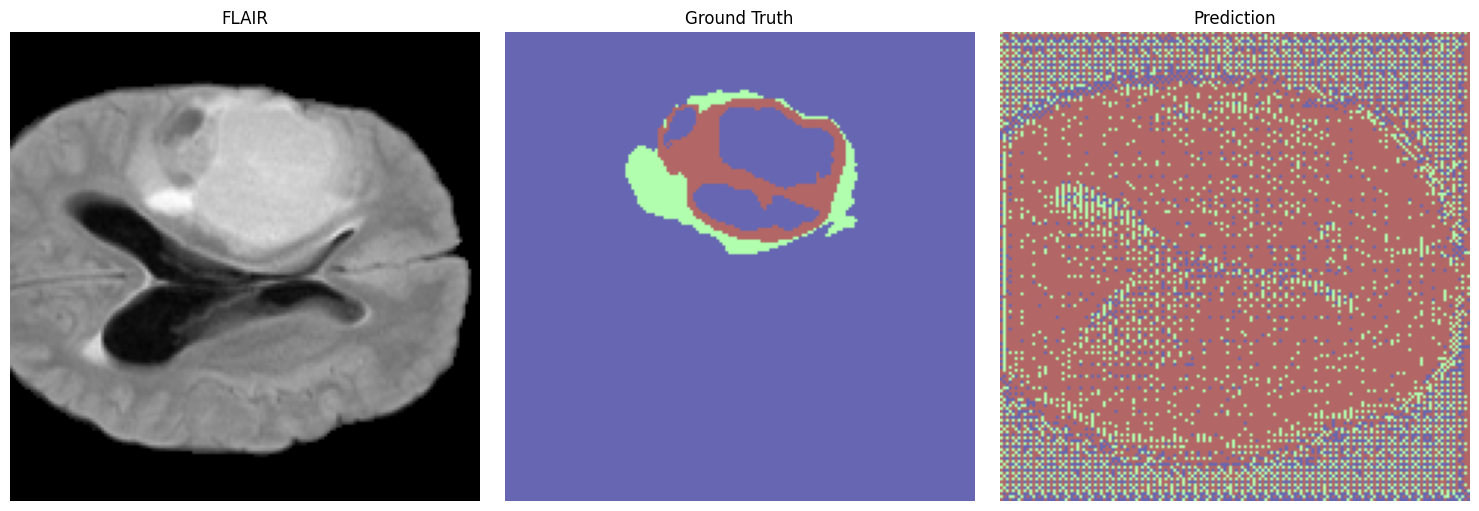

In [25]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def show_prediction(volume, gt_mask, pred_logits, slice_id=None):
    """
    Show input (FLAIR), ground truth, and prediction on one slice
    volume: (C, H, W, D)
    gt_mask: (H, W, D)
    """
    if slice_id is None:
        slice_id = volume.shape[-1] // 2

    # Use FLAIR channel
    flair_img = volume[0, :, :, slice_id].cpu().numpy()

    gt_slice = gt_mask[:, :, slice_id].cpu().numpy()
    pred_slice = torch.argmax(pred_logits, dim=1)[0, :, :, slice_id].cpu().numpy()

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(flair_img, cmap="gray")
    ax[0].set_title("FLAIR")
    ax[0].axis("off")

    ax[1].imshow(gt_slice, cmap="jet", alpha=0.6)
    ax[1].set_title("Ground Truth")
    ax[1].axis("off")

    ax[2].imshow(pred_slice, cmap="jet", alpha=0.6)
    ax[2].set_title("Prediction")
    ax[2].axis("off")

    plt.tight_layout()
    plt.show()


# -------- Visualize test samples --------
print("\nVisualizing predictions on test data")

unet_model.eval()
with torch.no_grad():
    shown = 0
    for batch in test_loader:
        imgs = batch["image"].to(run_device)
        masks = batch["seg"].to(run_device).squeeze(1)

        preds = unet_model(imgs)

        show_prediction(imgs[0], masks[0], preds)

        shown += 1
        if shown == 3:
            break
